In [1]:
import numpy as np
import pandas as pd 
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
# -*- coding: utf-8 -*-
import random
import math
import gym
import numpy as np
import matplotlib.pyplot as plt
from collections import deque
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.models import model_from_json
from keras.models import load_model
from keras.utils import plot_model
import h5py
from ann_visualizer.visualize import ann_viz

/Users/megumisano/anaconda/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/Users/megumisano/anaconda/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/Users/megumisano/anaconda/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
Using TensorFlow backend.
/Users/megumisano/anaconda/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:45: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  if d.decorator_argspec is not None), _inspect.getargspec(target))
/Users/megumisano/anaconda/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve 

In [2]:
class TeacherAgent:
    def __init__(self, state_size=4, action_size=3):
        self.state_size = state_size
        self.action_size = action_size
        self.memory = deque(maxlen=2000)
        self.gamma = 0.95    # discount rate
        self.epsilon = 1.0  # exploration rate
        self.epsilon_min = 0.01
        self.epsilon_decay = 0.995
        self.learning_rate = 0.001
        self.model = self._build_model()
        self.moves_since_hint = 0
        self.not_yet_rewarded = []

    def _build_model(self):
        # Neural Net for Deep-Q learning Model
        model = Sequential()
        model.add(Dense(24, input_dim=self.state_size, activation='relu'))
        model.add(Dense(24, activation='relu'))
        model.add(Dense(self.action_size, activation='linear'))
        model.compile(loss='mse',
                      optimizer=Adam(lr=self.learning_rate))
        return model

    def remember(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))

    def act(self, state):
        if self.moves_since_hint == 2: #Meaning the teacher waits at most 3 moves for a reward, could be tweaked
            self.moves_since_hint = 0
            return 2 #This enforces that we don't go too long without giving hints (could change to full OR partial hint l8r)
        if np.random.rand() <= self.epsilon:
            random_index = random.randrange(self.action_size)
            if random_index == 0:
                self.moves_since_hint += 1
            else:
                self.moves_since_hint = 0
            return random_index
        act_values = self.model.predict(state)
        nonrandom_index = np.argmax(act_values[0])  # returns action
        if nonrandom_index == 0:
            self.moves_since_hint += 1
        else:
            self.moves_since_hint = 0
        return nonrandom_index

    def replay(self, batch_size):
        minibatch = random.sample(self.memory, int(batch_size))
        for state, action, reward, next_state, done in minibatch:
            target = reward
            # if not done: #USED TO BE COMMENTED IN
            #print ("teacher agent state (should be an array with shape (4, )): ", next_state)
            # target = (reward + self.gamma *
            #           np.amax(self.model.predict(next_state)[0]))
            whole_list = self.model.predict(next_state)
            amax_result = np.amax(whole_list[0])
            target = reward + self.gamma * amax_result
            # tabbed over part above

            target_f = self.model.predict(state)
            target_f[0][action] = target
            self.model.fit(state, target_f, epochs=1, verbose=0)
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

    def load(self, name):
        self.model.load_weights(name)

    def save(self, name):
        self.model.save_weights(name)

In [23]:
teacher_agent = TeacherAgent()

In [24]:
print(teacher_agent.model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 24)                120       
_________________________________________________________________
dense_8 (Dense)              (None, 24)                600       
_________________________________________________________________
dense_9 (Dense)              (None, 3)                 75        
Total params: 795
Trainable params: 795
Non-trainable params: 0
_________________________________________________________________
None


In [25]:
plot_model(teacher_agent.model, to_file='teacher_model_plot.png', show_shapes=True, show_layer_names=True)

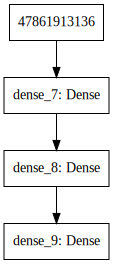

In [28]:
SVG(model_to_dot(teacher_agent.model).create(prog='dot', format='svg'))

In [27]:
ann_viz(teacher_agent.model, title="My second neural network", view=True, filename = 'teacher.gv')

/Users/megumisano/anaconda/lib/python3.6/subprocess.py:766: ResourceWarning: subprocess 88060 is still running
  ResourceWarning, source=self)
/Users/megumisano/anaconda/lib/python3.6/subprocess.py:766: ResourceWarning: subprocess 88065 is still running
  ResourceWarning, source=self)
/Users/megumisano/anaconda/lib/python3.6/subprocess.py:766: ResourceWarning: subprocess 88069 is still running
  ResourceWarning, source=self)


In [4]:
import seaborn as sns

/Users/megumisano/anaconda/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/Users/megumisano/anaconda/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


In [60]:
np.mean(np.array([-1359.5, -1512.6666666666667, -2713.1666666666665, -1848.2, -1591.6470588235295, -1988.4285714285713, -2027.1666666666667, -1037.2222222222222, -1505.7368421052631, -1761.25, -1017.1666666666666, -2386.1875, -806.8461538461538, -660.8571428571429, -2376.25, -1601.2, -2205.5238095238096, -1722.6842105263158, -1974.111111111111, -1129.3684210526317, -991.25, -1390.9285714285713, -421.53846153846155, -2213.1428571428573, -514.6666666666666, -2079.153846153846, -1786.4285714285713, -1271.9333333333334, -1746.923076923077, -1470.090909090909, -1822.7826086956522, -1262.7, -1533.4666666666667, -1334.9473684210527, -1572.6666666666667, -1274.0714285714287, -1288.0, -872.9230769230769, -2212.75, -1591.7142857142858, -1473.8181818181818, -1394.8181818181818, -1394.35, -1505.2105263157894, -377.45454545454544, -2405.777777777778, -1999.909090909091, -936.125, -3089.294117647059, -1067.25, -1069.5, -1801.25, -1252.75, -1979.0, -1452.55, -1411.5882352941176, -333.72727272727275, -1768.0588235294117, -1060.84, -494.46153846153845, -1638.25, -1576.2, -1039.5833333333333, -1482.7619047619048,-1618.923076923077, -1167.3333333333333, -2105.9655172413795, -542.8461538461538, -985.6666666666666, -1211.0, -1245.0, -2027.2, -1405.2,
 -1621.4166666666667, -1460.3846153846155, -1590.7407407407406, -1106.5384615384614, -1948.375, -2293.733333333333, -1123.6, -1129.5714285714287, -1230.375, -1436.5, -200.21052631578948, -850.1428571428571, -341.0769230769231, -795.3846153846154, -713.5555555555555, -1516.095238095238, -1393.2666666666667, -1004.0, -1644.25, -395.2, -1256.909090909091, -1014.2857142857143, -1012.0, -1705.4285714285713, -2512.5454545454545, -1485.5714285714287, -1131.5714285714287, -794.0, -1127.8, -182.47058823529412, -1249.125, -602.4166666666666, -1854.6666666666667, -1502.1666666666667, -735.3333333333334, -823.5, -1652.7777777777778, -882.4545454545455, -614.8947368421053, -1623.9166666666667, -1197.375, -1027.2666666666667, -1279.5833333333333, -1444.5, -1315.75, -1513.1666666666667, -1452.1, -2325.5454545454545, -1497.5294117647059, -1673.85, -1763.909090909091, -954.2727272727273, -439.1111111111111]))

-1378.0407365932654

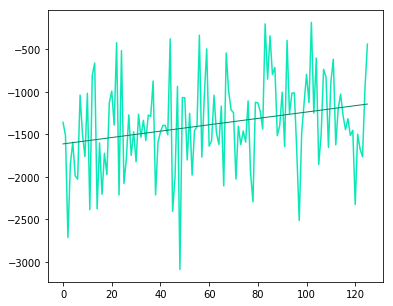

In [32]:
scores_list = [-1359.5, -1512.6666666666667, -2713.1666666666665, -1848.2, -1591.6470588235295, -1988.4285714285713, -2027.1666666666667, -1037.2222222222222, -1505.7368421052631, -1761.25, -1017.1666666666666, -2386.1875, -806.8461538461538, -660.8571428571429, -2376.25, -1601.2, -2205.5238095238096, -1722.6842105263158, -1974.111111111111, -1129.3684210526317, -991.25, -1390.9285714285713, -421.53846153846155, -2213.1428571428573, -514.6666666666666, -2079.153846153846, -1786.4285714285713, -1271.9333333333334, -1746.923076923077, -1470.090909090909, -1822.7826086956522, -1262.7, -1533.4666666666667, -1334.9473684210527, -1572.6666666666667, -1274.0714285714287, -1288.0, -872.9230769230769, -2212.75, -1591.7142857142858, -1473.8181818181818, -1394.8181818181818, -1394.35, -1505.2105263157894, -377.45454545454544, -2405.777777777778, -1999.909090909091, -936.125, -3089.294117647059, -1067.25, -1069.5, -1801.25, -1252.75, -1979.0, -1452.55, -1411.5882352941176, -333.72727272727275, -1768.0588235294117, -1060.84, -494.46153846153845, -1638.25, -1576.2, -1039.5833333333333, -1482.7619047619048,-1618.923076923077, -1167.3333333333333, -2105.9655172413795, -542.8461538461538, -985.6666666666666, -1211.0, -1245.0, -2027.2, -1405.2,
 -1621.4166666666667, -1460.3846153846155, -1590.7407407407406, -1106.5384615384614, -1948.375, -2293.733333333333, -1123.6, -1129.5714285714287, -1230.375, -1436.5, -200.21052631578948, -850.1428571428571, -341.0769230769231, -795.3846153846154, -713.5555555555555, -1516.095238095238, -1393.2666666666667, -1004.0, -1644.25, -395.2, -1256.909090909091, -1014.2857142857143, -1012.0, -1705.4285714285713, -2512.5454545454545, -1485.5714285714287, -1131.5714285714287, -794.0, -1127.8, -182.47058823529412, -1249.125, -602.4166666666666, -1854.6666666666667, -1502.1666666666667, -735.3333333333334, -823.5, -1652.7777777777778, -882.4545454545455, -614.8947368421053, -1623.9166666666667, -1197.375, -1027.2666666666667, -1279.5833333333333, -1444.5, -1315.75, -1513.1666666666667, -1452.1, -2325.5454545454545, -1497.5294117647059, -1673.85, -1763.909090909091, -954.2727272727273, -439.1111111111111]
plt.rcParams['axes.facecolor'] = 'white'
# df = pd.DataFrame()
# df['game'] = range(len(scores_list))
# df['score'] = scores_list
# sns.lineplot(data=df, x='game', y ='score')
# # plt.plot(scores_list)
# # plt.ylabel('average score value')
# # plt.xlabel('games')
# plt.show()
df = pd.DataFrame()
df['game'] = range(len(scores_list))
df['score'] = scores_list
plt.figure(figsize=(6,5))
plt.plot(range(126), scores_list, c='#0be8b7')
#ax = sns.lineplot(data=df, x='game', y ='score', palette=sns.color_palette("Set3", 10))
# plt.plot(scores_list)
# plt.ylabel('average score value')
# plt.xlabel('games')

#t= 5
new_list = []
# for i in range(len(scores_list) + 1 - t):
# for i in range(len(scores_list)//5):
#    # total = 0.0
# #     for j in range(t):
# #         total += 
#     if i != 25:
#         rel_scores = [scores_list[i * 5 + t] for t in range(5)]
#         rel_scores_arr = np.sort(np.array(rel_scores))
#         #max_ = np.max(np.array(rel_scores))
#         max_ = rel_scores_arr[2]
#         new_list.append(max_)
#     mean = total / (t + 0.0)
#     new_list.append(mean)
plt.plot(x_data, test_func(x_data, params[0], params[1]),
         label='Fitted function', c='#028467', linewidth=1.0)
# plt.yLabel('average score value')
# plt.xLabel('t games')
plt.show()

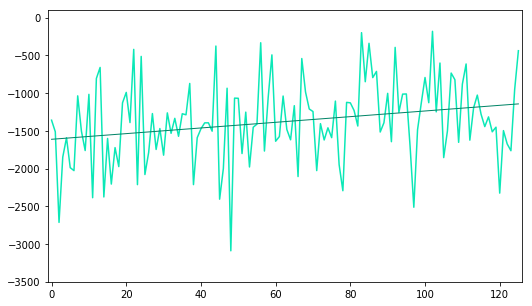

In [198]:
scores_list = [-1359.5, -1512.6666666666667, -2713.1666666666665, -1848.2, -1591.6470588235295, -1988.4285714285713, -2027.1666666666667, -1037.2222222222222, -1505.7368421052631, -1761.25, -1017.1666666666666, -2386.1875, -806.8461538461538, -660.8571428571429, -2376.25, -1601.2, -2205.5238095238096, -1722.6842105263158, -1974.111111111111, -1129.3684210526317, -991.25, -1390.9285714285713, -421.53846153846155, -2213.1428571428573, -514.6666666666666, -2079.153846153846, -1786.4285714285713, -1271.9333333333334, -1746.923076923077, -1470.090909090909, -1822.7826086956522, -1262.7, -1533.4666666666667, -1334.9473684210527, -1572.6666666666667, -1274.0714285714287, -1288.0, -872.9230769230769, -2212.75, -1591.7142857142858, -1473.8181818181818, -1394.8181818181818, -1394.35, -1505.2105263157894, -377.45454545454544, -2405.777777777778, -1999.909090909091, -936.125, -3089.294117647059, -1067.25, -1069.5, -1801.25, -1252.75, -1979.0, -1452.55, -1411.5882352941176, -333.72727272727275, -1768.0588235294117, -1060.84, -494.46153846153845, -1638.25, -1576.2, -1039.5833333333333, -1482.7619047619048,-1618.923076923077, -1167.3333333333333, -2105.9655172413795, -542.8461538461538, -985.6666666666666, -1211.0, -1245.0, -2027.2, -1405.2,
 -1621.4166666666667, -1460.3846153846155, -1590.7407407407406, -1106.5384615384614, -1948.375, -2293.733333333333, -1123.6, -1129.5714285714287, -1230.375, -1436.5, -200.21052631578948, -850.1428571428571, -341.0769230769231, -795.3846153846154, -713.5555555555555, -1516.095238095238, -1393.2666666666667, -1004.0, -1644.25, -395.2, -1256.909090909091, -1014.2857142857143, -1012.0, -1705.4285714285713, -2512.5454545454545, -1485.5714285714287, -1131.5714285714287, -794.0, -1127.8, -182.47058823529412, -1249.125, -602.4166666666666, -1854.6666666666667, -1502.1666666666667, -735.3333333333334, -823.5, -1652.7777777777778, -882.4545454545455, -614.8947368421053, -1623.9166666666667, -1197.375, -1027.2666666666667, -1279.5833333333333, -1444.5, -1315.75, -1513.1666666666667, -1452.1, -2325.5454545454545, -1497.5294117647059, -1673.85, -1763.909090909091, -954.2727272727273, -439.1111111111111]
plt.rcParams['axes.facecolor'] = 'white'
# df = pd.DataFrame()
# df['game'] = range(len(scores_list))
# df['score'] = scores_list
# sns.lineplot(data=df, x='game', y ='score')
# # plt.plot(scores_list)
# # plt.ylabel('average score value')
# # plt.xlabel('games')
# plt.show()
df = pd.DataFrame()
scores_list = scores_list
df['game'] = range(len(scores_list))
df['score'] = scores_list
plt.figure(figsize=(8.5,5))
plt.plot(range(126), scores_list, c='#0be8b7')
#ax = sns.lineplot(data=df, x='game', y ='score', palette=sns.color_palette("Set3", 10))
# plt.plot(scores_list)
# plt.ylabel('average score value')
# plt.xlabel('games')

#t= 5
new_list = []
# for i in range(len(scores_list) + 1 - t):
# for i in range(len(scores_list)//5):
#    # total = 0.0
# #     for j in range(t):
# #         total += 
#     if i != 25:
#         rel_scores = [scores_list[i * 5 + t] for t in range(5)]
#         rel_scores_arr = np.sort(np.array(rel_scores))
#         #max_ = np.max(np.array(rel_scores))
#         max_ = rel_scores_arr[2]
#         new_list.append(max_)
#     mean = total / (t + 0.0)
#     new_list.append(mean)
x_data = range(126)
plt.plot(x_data, test_func(x_data, params[0], params[1]),
         label='Fitted function', c='#028467', linewidth=1.0)
# plt.yLabel('average score value')
# plt.xLabel('t games')
plt.gca().set_ylim(-3500, 100)
plt.gca().set_xlim(-1, 126)
plt.show()

In [222]:
np.percentile(np.array(scores_list),75)

-1029.7555555555555

In [156]:
params = fit_line(scores_list)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     8.283
Date:                Mon, 03 Dec 2018   Prob (F-statistic):            0.00471
Time:                        08:32:14   Log-Likelihood:                -968.60
No. Observations:                 126   AIC:                             1941.
Df Residuals:                     124   BIC:                             1947.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1612.3526     94.198    -17.117      0.0

In [266]:
_params = fit_line(with_scores_list)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.008
Method:                 Least Squares   F-statistic:                    0.1030
Date:                Mon, 03 Dec 2018   Prob (F-statistic):              0.749
Time:                        21:29:14   Log-Likelihood:                -876.56
No. Observations:                 109   AIC:                             1757.
Df Residuals:                     107   BIC:                             1762.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1319.5445    144.421     -9.137      0.0

ValueError: operands could not be broadcast together with shapes (109,) (126,) 

In [272]:
len(with_scores_list)

109

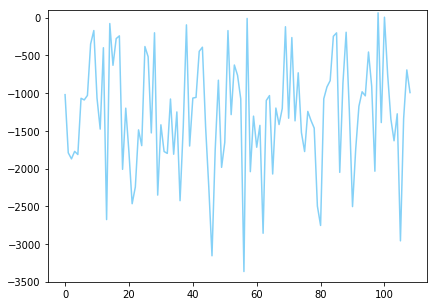

    -1378.04073659
    -1279.50283162


In [304]:
with_scores_list = [-1021.3333333333334, -1791.9, -1871.6315789473683, -1772.2608695652175, -1814.2068965517242, -1069.15625, -1091.4285714285713, -1031.5652173913043, -350.0, -172.23529411764707, -1067.0833333333333, -1477.5555555555557, -399.85, -2676.0, -79.36363636363636,  -632.5, -279.2631578947368, -242.58333333333334, -2010.5384615384614, -1200.25, -1786.5555555555557, -2465.785714285714, -2244.0714285714284, -1487.8333333333333, -1696.65, -384.25, -518.1818181818181, -1528.0, -201.91666666666666, -2351.6875, -1420.5454545454545, -1774.3809523809523, -1799.357142857143, -1079.111111111111, -1810.3076923076924, -1250.1666666666667, -2425.6666666666665, -1450.391304347826, -96.92307692307692, -1701.6666666666667, -1066.625,  -1057.7692307692307, -447.875, -392.8421052631579, -1448.1052631578948, -2247.4583333333335, -3155.4210526315787, -1756.0526315789473, -829.7333333333333, -1984.1666666666667, -1653.8846153846155, -173.0, -1285.6923076923076,  -628.695652173913, -764.5, -1076.1538461538462, -3364.0625, -11.8, -2041.3157894736842, -1305.909090909091, -1717.888888888889,  -1428.1333333333334, -2857.125, -1098.6666666666667, -1033.4285714285713, -2072.235294117647, -1198.7,  -1416.8181818181818, -1204.2307692307693, -121.66666666666667,  -1333.5, -265.0952380952381, -1368.2631578947369, -731.6666666666666, -1523.1666666666667, -1774.7333333333333, -1243.4, -1363.6923076923076,-1464.1333333333334, -2497.6521739130435, -2753.7368421052633, -1075.1, -918.3333333333334, -835.6363636363636, -248.42857142857142, -203.0, -2050.3636363636365, -867.0, -194.75, -1234.3846153846155, -2504.0, -1739.642857142857, -1174.6923076923076, -983.0909090909091, -1037.0, -456.4166666666667, -909.5, -2035.4166666666667, 62.666666666666664, -1390.909090909091, 4.666666666666667, -757.7777777777778, -1343.1818181818182, -1632.1666666666667, -1275.0, -2957.68, -1339.1818181818182, -693.6, -993.7391304347826]
plt.figure(figsize=(6.8,5))
plt.plot(range(len(with_scores_list)), with_scores_list, c='#85d1f7')
# plt.plot(range(len(with_scores_list)), test_func(range(len(with_scores_list)), _params[0], _params[1]),
#          label='Fitted function', c='#028467', linewidth=1.0)
plt.gca().set_ylim(-3500, 100)
plt.show()
print("    " + str(np.mean(np.array(scores_list))))
print("    " + str(np.mean(np.array(with_scores_list))))

In [96]:
def fit_line(list_):
    X = range(len(list_))
    y = list_

    X2 = sm.add_constant(X)
    est = sm.OLS(y, X2)
    est2 = est.fit()
    print(est2.summary())
    
    def test_func(x, a, b):
        return a * x + b 

    x_data = range(len(list_))
    params, params_covariance = optimize.curve_fit(test_func, x_data, scores_list,
                                                   p0=[2, 2])
    print(params)
    return params


In [33]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

X = range(100)
y = scores_list[0:100]

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     6.122
Date:                Sun, 02 Dec 2018   Prob (F-statistic):             0.0151
Time:                        19:41:27   Log-Likelihood:                -770.18
No. Observations:                 100   AIC:                             1544.
Df Residuals:                      98   BIC:                             1550.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1650.4752    107.343    -15.376      0.0

[    3.74899038 -1612.35263537]


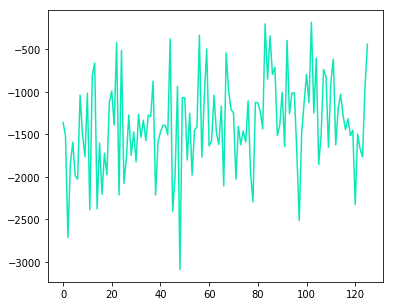

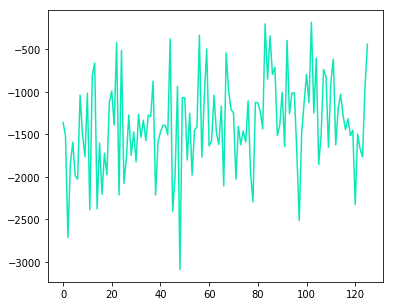

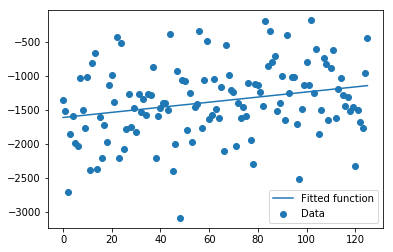

In [7]:
from scipy import optimize

def test_func(x, a, b):
    return a * x + b 

x_data = range(126)
params, params_covariance = optimize.curve_fit(test_func, x_data, scores_list,
                                               p0=[2, 2])

print(params)

plt.figure(figsize=(6, 4))
plt.scatter(x_data, scores_list, label='Data')
plt.plot(x_data, test_func(x_data, params[0], params[1]),
         label='Fitted function')

plt.legend(loc='best')

plt.show()

In [254]:
##### without teacher student tests 

# without_teacher_0
# [-1226.4285714285713, -209.84, -667.5, -1741.6923076923076, -1607.4666666666667]
# without_teacher_1
# [-1165.5, -1401.7142857142858, -1524.1818181818182, -1797.357142857143, -1288.0]
# without_teacher_2 
# [-1631.875, -1050.5, -1596.357142857143, -601.0666666666667, -2390.157894736842]
# without_teacher_3
# [-3045.214285714286, -1456.15, -564.0909090909091, -1841.0, -280.7857142857143]
# without_teacher_4 
# [-963.3333333333334, -1866.3076923076924, -1306.6363636363637, -1133.5882352941176, -1638.0588235294117]
# without_teacher_5 

scores = {
    #'0' : [-1226.4285714285713, -209.84, -667.5, -1741.6923076923076, -1607.4666666666667],
    '1' : [-1165.5, -1401.7142857142858, -1524.1818181818182, -1797.357142857143, -1288.0],
    '2' : [-1631.875, -1050.5, -1596.357142857143, -601.0666666666667, -2390.157894736842],
    '3' : [-3045.214285714286, -1456.15, -564.0909090909091, -1841.0, -280.7857142857143]
    #'4' : [-963.3333333333334, -1866.3076923076924, -1306.6363636363637, -1133.5882352941176, -1638.0588235294117],
    #'5' : [-1223.391304347826, -764.8235294117648, -467.6, -1820.3333333333333, -1399.7857142857142]
}

with_scores = {
    '1':[-1566.857142857143, -921.9375, -1400.3, -296.92857142857144, -1421.111111111111, -567.9285714285714],
    '2':[-1249.2307692307693, -1356.857142857143, -957.6363636363636, -929.875, -1916.1904761904761, -1268.8823529411766], # -1756.7368421052631
    '3':[-847.7142857142857, -1313.1333333333334, -354.9230769230769, -1043.4166666666667, -2184.3703703703704]
}

# new_list_ = []
# num_students = 3
# for column in range(3):
#     for i in range(num_students):
#         student_num = i + 1
#         new_list_.append(scores[str(student_num)][column])
by_student = [np.mean(np.array(scores_list)) for scores_list in scores.values()]
with_by_student = [np.mean(np.array(scores_list)) for scores_list in with_scores.values()]
print("    " + str(np.mean(np.array(by_student))))
print("    " + str(np.mean(np.array(with_by_student))))

    -1442.26339067
    -1152.55579341


In [258]:
len(by_student)

3

In [175]:
# new_list = 
# [-1165.5, -1631.875, -3045.214285714286, -963.3333333333334, ]

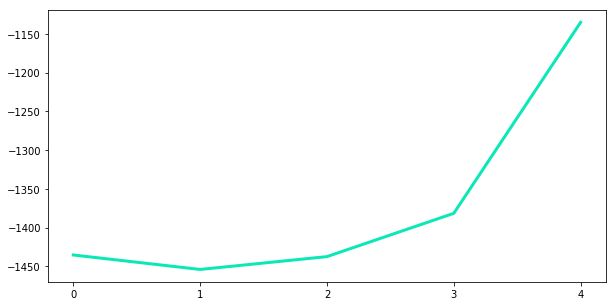

In [176]:
plt.figure(figsize=(10,5))
plt.plot(range(5), by_student[:5], color = '#0be8b7', linewidth = 3)
#plt.plot(range(4), by_student[:4], color = '#0be8b7', linewidth = 3)
plt.xticks(np.arange(0, 5, step=1))
plt.show()

In [138]:
# d = pd.DataFrame()
# list_ = [1,2,3,4,5]
# bigger_list = list_ * 5
# d['student'] = bigger_list
# d['score'] = new_list #[scores[str(i)][j] for j in range(5) for i in range(1,6)] 

In [11]:
# sns.lineplot(data=d, x='student', y='score')
# plt.show()

In [259]:
bar_d = pd.DataFrame()
bar_d['scores'] = by_student + with_by_student
without = ['without'] * len(by_student)
with_ = ['with'] * len(with_by_student)
condition_list = without + with_
bar_d['condition'] = condition_list

In [260]:
bar_d

,scores,condition
0,-1435.350649,without
1,-1453.991341,without
2,-1437.448182,without
3,-1029.177149,with
4,-1279.778684,with
5,-1148.711547,with


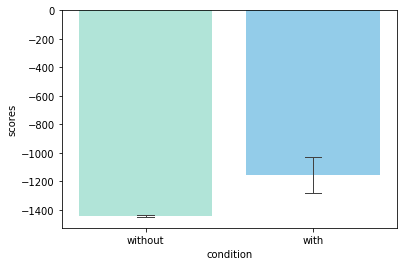

In [256]:
sns.barplot(x="condition", y="scores", data=bar_d, palette=['#a8eddd', '#85d1f7'], errwidth=1, capsize=0.1)
plt.show()

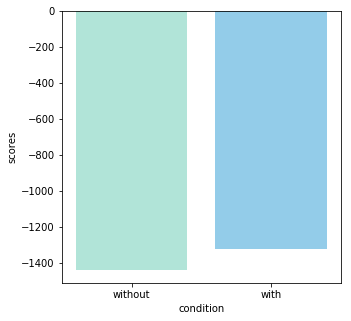

In [270]:
mini_d = pd.DataFrame()
mini_without = [-3045.214285714286, -1456.15, -564.0909090909091, -1841.0, -280.7857142857143]
mini_with = [-880.1538461538462, -1292.875, -948.25, -1744.0, -1184.96, -1887.9]
mini_d['scores'] = mini_without + mini_with
without = ['without'] * len(mini_without)
with_ = ['with'] * len(mini_with)
condition_list = without + with_
mini_d['condition'] = condition_list
plt.figure(figsize=(5,5))
sns.barplot(x="condition", y="scores", data=mini_d, palette=['#a8eddd', '#85d1f7'], errwidth=1, capsize=0.1, ci=None)
plt.show()

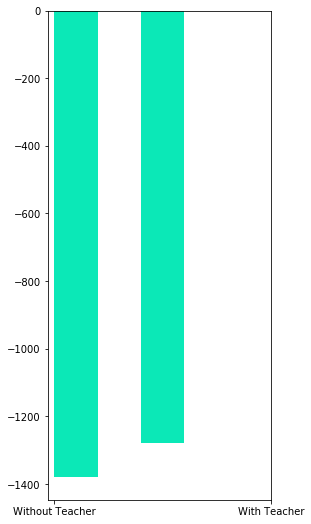

In [278]:
with_teacher_mean = np.mean(np.array(with_scores_list))
plt.figure(figsize=(4,9))
plt.bar([0.1, 0.5], [-1378.0407365932654, with_teacher_mean], width=0.2, color='#0be8b7')
plt.xticks(np.arange(2), ('Without Teacher', 'With Teacher'))
plt.show()

NEW DATA

In [308]:
# training
# with teacher scores list 
with_teacher_train_scores = [-1021.3333333333334, -1791.9, -1871.6315789473683, -1772.2608695652175, -1814.2068965517242, -1069.15625, -1091.4285714285713, -1031.5652173913043, -350.0, -172.23529411764707, -1067.0833333333333, -1477.5555555555557, -399.85, -2676.0, -79.36363636363636,  -632.5, -279.2631578947368, -242.58333333333334, -2010.5384615384614, -1200.25, -1786.5555555555557, -2465.785714285714, -2244.0714285714284, -1487.8333333333333, -1696.65, -384.25, -518.1818181818181, -1528.0, -201.91666666666666, -2351.6875, -1420.5454545454545, -1774.3809523809523, -1799.357142857143, -1079.111111111111, -1810.3076923076924, -1250.1666666666667, -2425.6666666666665, -1450.391304347826, -96.92307692307692, -1701.6666666666667, -1066.625,  -1057.7692307692307, -447.875, -392.8421052631579, -1448.1052631578948, -2247.4583333333335, -3155.4210526315787, -1756.0526315789473, -829.7333333333333, -1984.1666666666667, -1653.8846153846155, -173.0, -1285.6923076923076,  -628.695652173913, -764.5, -1076.1538461538462, -3364.0625, -11.8, -2041.3157894736842, -1305.909090909091, -1717.888888888889,  -1428.1333333333334, -2857.125, -1098.6666666666667, -1033.4285714285713, -2072.235294117647, -1198.7,  -1416.8181818181818, -1204.2307692307693, -121.66666666666667,  -1333.5, -265.0952380952381, -1368.2631578947369, -731.6666666666666, -1523.1666666666667, -1774.7333333333333, -1243.4, -1363.6923076923076,-1464.1333333333334, -2497.6521739130435, -2753.7368421052633, -1075.1, -918.3333333333334, -835.6363636363636, -248.42857142857142, -203.0, -2050.3636363636365, -867.0, -194.75, -1234.3846153846155, -2504.0, -1739.642857142857, -1174.6923076923076, -983.0909090909091, -1037.0, -456.4166666666667, -909.5, -2035.4166666666667, 62.666666666666664, -1390.909090909091, 4.666666666666667, -757.7777777777778, -1343.1818181818182, -1632.1666666666667, -1275.0, -2957.68, -1339.1818181818182, -693.6, -993.7391304347826, -299.85714285714283, -1560.5, -1202.0625, -127.33333333333333, -1293.8, -329.57142857142856, -121.25]
assert len(with_teacher_train_scores) == 116
# with teacher hint distribution 
with_teacher_hints = []
assert len(with_teacher_hints) == 0 ## last 140 

# testing 
test_num = 0 
# without teacher scores list 
without_teacher_test_scores = [-1718.2307692307693, -920.5384615384615, -405.5, -1088.9166666666667, -292.0, -1023.6363636363636, -397.0, -1171.6, -224.11111111111111, -2630.6, -715.2222222222222, -1398.076923076923, -1358.25, -2059.722222222222, -1447.5, -1422.6923076923076, -1443.0, -224.2, -405.5, -1957.6923076923076, -1372.0, -402.8235294117647, -656.6, -1382.3076923076924, -214.35714285714286, -719.7142857142857, -961.0, -1334.5, -1728.25, -829.5, -762.0, -646.7222222222222, -1248.8, -1078.6, -987.4285714285714, -595.1428571428571, -1666.6, -2114.8571428571427, -570.0, -1564.7333333333333, -1270.3, -1115.5333333333333, -1484.4705882352941, -1800.5333333333333, -1445.142857142857, -869.1818181818181, -982.0, -1554.3125, -1316.7692307692307, -1174.7272727272727, -1534.0714285714287, -689.5, -862.3333333333334, -1017.9, -1017.9, -218.05882352941177, -534.8, -353.8, -1390.0, -510.0, -295.57142857142856, -1653.1176470588234, -1571.0, -1221.0, -752.25, -1363.3125, -317.55, -1562.25, -514.5714285714286, -207.8, -1888.1176470588234, -394.25, -1904.090909090909, -1383.2, -869.1818181818181, -916.0, -1017.7647058823529, -2286.9523809523807, -718.3333333333334, -676.6, -257.2142857142857, -961.0, -961.0, -996.1, -993.5, -1024.25, -1583.0588235294117, -1849.7857142857142, -1463.7, -397.6666666666667, -259.5, -474.0, -953.4, -591.0, -394.25, -961.0, -1745.3076923076924, -556.5555555555555, -514.3333333333334, -1049.8181818181818, -373.77777777777777, -206.0, -1350.6666666666667, -487.0, -1828.9333333333334, -469.2, -1320.3076923076924, -422.45454545454544, -3004.5882352941176, -880.2857142857143, -1705.5454545454545, -399.75, -961.0, -450.0, -1039.8125, -920.3636363636364, -437.8, -985.25, -1680.5714285714287, -2135.0714285714284, -1663.4615384615386, -1483.5833333333333,-1409.3333333333333, -1246.5384615384614, -940.6363636363636, -898.5555555555555, -1485.5384615384614, -1182.2307692307693, -1235.2857142857142, -753.3636363636364, -1601.2857142857142, -869.1818181818181, -47.0, -2000.0, -158.66666666666666, -1150.5,-1806.5, -719.6666666666666, -438.0, -662.6153846153846, -1836.2941176470588, -545.8, -624.3636363636364, -1161.9285714285713, -1209.2307692307693, -100.71428571428571, -1794.5384615384614, -427.6, -908.6666666666666, -1942.4444444444443, -828.0434782608696, -1213.5, -1262.923076923077, -588.0, -117.8, -981.7, -1544.9285714285713, -1075.3, -206.0, -873.0, -139.11764705882354, -793.6666666666666, -775.0, -376.22222222222223, -844.5454545454545, -446.6666666666667, -1482.0, -792.9, -961.0, -915.7, -1615.2142857142858, -452.5, -1533.8461538461538, -517.2, -1417.5882352941176, -1235.75, -961.0, -416.3333333333333, -734.1818181818181, -405.5, -290.4, -467.2307692307692, -460.05882352941177, -1835.9166666666667, -1712.0666666666666, -843.0909090909091, -551.4, -678.5454545454545, -2168.5882352941176, -164.8125, -435.1, -1027.5, -463.0, -1074.0, -1866.7058823529412, -2486.0,-1158.2857142857142, -1712.0, -961.0, -511.1111111111111, -1415.4375, -634.4, -1437.3636363636363, -194.16666666666666, -661.4444444444445, -198.6818181818182, -1771.6470588235295, -403.625, -167.16666666666666, -173.95, -437.44444444444446, -1233.7142857142858, -1476.5, -891.2222222222222, -1026.142857142857, -2011.25, -2089.1875, -259.5, -386.2857142857143, -1496.2307692307693, -1234.7, -1613.1333333333334, -439.6666666666667, -732.3, -869.1818181818181, -384.8888888888889, -2376.230769230769, -510.875, -2086.285714285714, -708.8333333333334, -1498.7692307692307, -948.3636363636364, -831.9090909090909, -595.1428571428571, -1357.7272727272727, -869.1818181818181, -2763.230769230769, -1850.9375, -1396.2142857142858, -768.4, -1114.4166666666667, -753.0833333333334, -682.0909090909091, -1005.3571428571429, -2812.315789473684, -566.6428571428571, -1237.5833333333333, -512.25, -3174.0, -242.66666666666666]
assert len(without_teacher_test_scores) == 250
# without teacher number of matches 
without_teacher_test_matches = [0.0, 0.0, 0.0, 0.25, 0.0, 0.0, 0.0, 0.1, 0.2222222222222222, 0.0, 0.1111111111111111, 0.0, 0.0625, 0.2222222222222222, 0.0, 0.15384615384615385, 0.06666666666666667, 0.0, 0.0, 0.07692307692307693, 0.0, 0.0, 0.1, 0.15384615384615385, 0.0, 0.14285714285714285, 0.0, 0.16666666666666666, 0.0625, 0.125, 0.0, 0.05555555555555555, 0.0, 0.0, 0.14285714285714285, 0.14285714285714285,0.2, 0.0, 0.0, 0.06666666666666667, 0.0, 0.13333333333333333, 0.11764705882352941, 0.06666666666666667, 0.14285714285714285,0.18181818181818182, 0.0, 0.125, 0.0, 0.09090909090909091, 0.07142857142857142, 0.0, 0.16666666666666666, 0.0, 0.0, 0.0, 0.2,0.0, 0.07692307692307693, 0.0, 0.0, 0.0, 0.14285714285714285, 0.0, 0.0, 0.0625, 0.0, 0.0, 0.0, 0.0, 0.058823529411764705, 0.0,0.0, 0.0, 0.18181818181818182, 0.0, 0.11764705882352941, 0.09523809523809523, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.25, 0.11764705882352941, 0.07142857142857142, 0.2, 0.0, 0.0, 0.1111111111111111, 0.2, 0.0, 0.0, 0.0, 0.15384615384615385, 0.0, 0.0, 0.09090909090909091, 0.0, 0.0, 0.0, 0.0, 0.26666666666666666, 0.0, 0.07692307692307693, 0.09090909090909091, 0.11764705882352941,0.0, 0.09090909090909091, 0.0, 0.0, 0.0, 0.0625, 0.18181818181818182, 0.2, 0.0, 0.14285714285714285, 0.21428571428571427, 0.07692307692307693, 0.08333333333333333, 0.0, 0.15384615384615385, 0.09090909090909091, 0.0, 0.07692307692307693, 0.0, 0.0, 0.0,0.07142857142857142, 0.18181818181818182, 0.0, 0.2, 0.0, 0.0, 0.125, 0.0, 0.0, 0.0, 0.17647058823529413, 0.0, 0.0, 0.14285714285714285, 0.07692307692307693, 0.0, 0.07692307692307693, 0.0, 0.0, 0.16666666666666666, 0.08695652173913043, 0.08333333333333333, 0.15384615384615385, 0.2222222222222222, 0.0, 0.0, 0.0, 0.0, 0.0, 0.08333333333333333, 0.0, 0.0, 0.16666666666666666, 0.1111111111111111, 0.09090909090909091, 0.0, 0.07692307692307693, 0.0, 0.0, 0.1, 0.2857142857142857, 0.0, 0.0, 0.0, 0.17647058823529413, 0.08333333333333333, 0.0, 0.1111111111111111, 0.0, 0.0, 0.0, 0.0, 0.11764705882352941, 0.08333333333333333, 0.0, 0.2727272727272727, 0.0, 0.0, 0.17647058823529413, 0.0, 0.0, 0.0, 0.0, 0.09090909090909091, 0.11764705882352941, 0.17647058823529413, 0.14285714285714285, 0.08333333333333333, 0.0, 0.1111111111111111, 0.3125, 0.0, 0.0, 0.0, 0.1111111111111111, 0.045454545454545456, 0.11764705882352941, 0.0, 0.16666666666666666, 0.0, 0.1111111111111111, 0.07142857142857142, 0.0, 0.0, 0.14285714285714285, 0.1875, 0.125, 0.0, 0.0, 0.07692307692307693, 0.0, 0.06666666666666667, 0.06666666666666667, 0.0, 0.18181818181818182,0.0, 0.07692307692307693, 0.0, 0.14285714285714285, 0.16666666666666666, 0.07692307692307693, 0.0, 0.0, 0.14285714285714285, 0.18181818181818182, 0.18181818181818182, 0.07692307692307693, 0.0, 0.0, 0.0, 0.0, 0.16666666666666666, 0.0, 0.07142857142857142, 0.21052631578947367, 0.14285714285714285, 0.08333333333333333, 0.0, 0.0625, 0.16666666666666666]
assert len(without_teacher_test_matches) == 250
# without teacher number of rounds 
without_teacher_test_rounds = [13, 13, 8, 12, 5, 11, 8, 10, 9, 15, 9, 13, 16, 18, 12, 13, 15, 15, 8, 13, 12, 17, 10, 13, 14, 14, 10, 12, 16, 8, 10, 18, 15,10, 14, 7, 15, 14, 8, 15, 10, 15, 17, 15, 14, 11, 10, 16, 13, 11, 14, 12, 12, 10, 10, 17, 5, 10, 13, 12, 14, 17, 14, 12, 12, 16, 20, 12, 14, 5, 17, 8, 11, 10, 11, 10, 17, 21, 9, 10, 14, 10, 10, 10, 10, 12, 17, 14, 10, 6, 8, 9, 10, 10, 8, 10, 13, 9, 9,11, 9, 5, 12, 8, 15, 10, 13, 11, 17, 7, 11, 8, 10, 8, 16, 11, 5, 8, 14, 14, 13, 12, 12, 13, 11, 9, 13, 13, 14, 11, 14, 11, 3,20, 18, 12, 8, 12, 9, 13, 17, 10, 11, 14, 13, 7, 13, 10, 12, 18, 23, 12, 13, 9, 20, 10, 14, 10, 5, 12, 17, 9, 12, 9, 11, 9, 13, 10, 10, 10, 14, 10, 13, 15, 17, 12, 10, 9, 11, 8, 15, 13, 17, 12, 15, 11, 10, 11, 17, 16, 10, 14, 10, 11, 17, 17, 14, 12, 10, 9, 16, 10, 11, 6, 9, 22, 17, 8, 6, 20, 9, 14, 12, 9, 14, 16, 16, 8, 14, 13, 10, 15, 15, 10, 11, 9, 13, 8, 14, 6, 13, 11, 11, 7, 11, 11, 13, 16, 14, 10, 12, 12, 11, 14, 19, 14, 12, 8, 16, 6]
assert len(without_teacher_test_rounds) == 250
# without material differences 
mat1 = [13, 12, 4, 0, 2, 11, 4, 17, 2, -24, 9, 19, 13, -19, 21, -21, 14, -31, 4, 21, 15, -31, 7, 18, -26, 10, 12, 19, 16, 4, 10, -20,9, 15, 6, 3, 14, -23, 10, 22, 11, 19, 17, 19, 14, 15, 12, 18, 17, 7, -19, 11, 10, 13, 13, -14, 2, -29, 15, -17, -19, 17, 20,11, 19, 19, -30, 20, -20, 1, 19, 4, 19, 17, 15, 10, 8, 20, 5, 4, -9, 12, 12, 13, 12, 12, 18, 17, 3, 1, 4, 2, 5, 10, 4, 12, 22, 5, 6, 11, -19, 1, 11, 5, 9, -13, 14, -18, -23, 7, 10, 4, 12, 4, 10, 14, 2, 8, 19, 22, 14, 18, 23, -27, 16, 15, 16, 20, 13, 6, 14, 15, 1, 17, -18, 15, 14, -22, -20, -18, 11, 5, 6, -12, 11, 1, 17, 4, 7, 20, -25, 11, 13, 4, -19, 13, 21, 9, 1, 21, -15, 10, 4, 4, 9, 3, 13, 4, 12, 4, 19, -20, 19, -18, 14, 13, 12, 5, 10, 4, -31, -23, -29, 13, 16, 15, 5, 7, 18, -24, -16, 8, -20, 14, 23, 21, 15, 21, 12, 1, 12, 10, -18, 2, 3, -30, 17, 4, 1, -32, 3, 9, 20, 7, 4, 21, 18, 4, -28, 15, 16, 20, -23, 5, 15, 2, 22,3, 19, 4, 18, 9, 4, 2, 4, 15, -22, -15, -16, 5, 11, 11, 6, 10, 21, 16, 11, 10, 24, -1]
without_teacher_test_material = [abs(i) for i in mat1]
assert len(without_teacher_test_material) == 250
# with teacher scores list 
with_teacher_test_scores = []
assert len(with_teacher_test_scores) == test_num
# with teacher number of matches 
with_teacher_test_matches = []
assert len(with_teacher_test_matches) == test_num
# with teacher number of rounds 
with_teacher_test_rounds = []
assert len(with_teacher_test_rounds) == test_num
# with material differences 
with_teacher_test_material = []
assert len(with_teacher_test_material) == test_num
# with random scores list 
with_random_test_scores = [-325.57142857142856, -1619.25, -463.3333333333333, -1459.357142857143, -245.14285714285714, -1628.3636363636363, -550.9375, -1626.3529411764705, -1003.0, -832.8, -629.1428571428571, -1451.5384615384614, -298.7142857142857, -1763.4285714285713, -2235.3333333333335, -1196.5, -877.4166666666666, -290.6666666666667, -1033.2, -859.4444444444445, -737.125, -314.7142857142857, -617.3, -873.3571428571429, -2801.6, -504.05555555555554, -251.69230769230768, -1376.3846153846155, -86.5, -2004.2, -689.7, -1314.6363636363637, -385.0833333333333, -1103.7777777777778, -1341.2307692307693, -2375.3333333333335, -1494.9, -146.2, -2004.5333333333333, -278.92857142857144, -1768.923076923077, -1782.4, -1858.8461538461538, -1775.6923076923076, -2068.0, -841.3, -842.0, -1016.6363636363636, -2023.6923076923076, -851.375]
assert len(with_random_test_scores) == 50
# with random number of matches 
with_random_test_matches = [0.0, 0.125, 0.0, 0.2857142857142857, 0.0, 0.09090909090909091, 0.0, 0.11764705882352941, 0.0, 0.2, 0.0, 0.3076923076923077, 0.0, 0.0, 0.2, 0.0, 0.08333333333333333, 0.0, 0.0, 0.1111111111111111, 0.0, 0.14285714285714285, 0.0, 0.0, 0.0, 0.1111111111111111, 0.0, 0.07692307692307693, 0.125, 0.13333333333333333, 0.0, 0.0,0.08333333333333333, 0.1111111111111111, 0.0, 0.08333333333333333, 0.2, 0.0, 0.0, 0.0, 0.0, 0.06666666666666667, 0.3076923076923077, 0.0, 0.2, 0.0, 0.2, 0.0, 0.23076923076923078, 0.0625]
assert len(with_random_test_matches) == 50
# with random number of rounds 
with_random_test_rounds = [7, 16, 9, 14, 21, 11, 16, 17, 9, 15, 7, 13, 14, 14, 15, 14, 12, 18, 10, 9, 8, 7, 10, 14, 15, 18, 13, 13, 8, 15, 10, 11, 12, 9, 13, 12, 10, 5, 15, 14, 13, 15, 13, 13, 10, 10, 10, 11, 13, 16]
assert len(with_random_test_rounds) == 50
# with random material differences 
with_random_test_material = [1, 16, -19, 20, -25, 17, -34, 17, 8, 8, 7, 15, -27, -21, 15, 12, 6, -34, 10, 7, 6, -1, 4, -20, 26, 8, -33, 15, 0, 18, 12, 12, 4, 9, 8, 17, 16, 1, 20, -25, 15, 24, 14, 16, 19, 12, 9, 9, 18, 3]
assert len(with_random_test_material) == 50

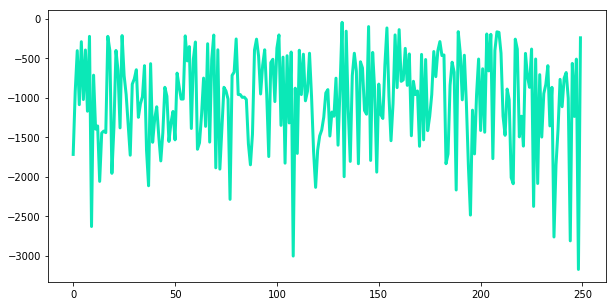

In [300]:
### TEST SCORES 
# test_scores = pd.DataFrame()
# test_scores['condition'] = ['with_teacher'] * len(with_teacher_test_scores) + 
# test_scores['with_teacher'] = with_teacher_test_scores
# test_scores['without_teacher'] = without_teacher_test_scores
# test_scores['with_random'] = with_random_test_scores
plt.figure(figsize=(10,5))
plt.plot(range(len(without_teacher_test_scores)), without_teacher_test_scores, color = '#0be8b7', linewidth = 3)
#plt.plot(range(4), by_student[:4], color = '#0be8b7', linewidth = 3)
#plt.xticks(np.arange(0, 5, step=1))
plt.show()

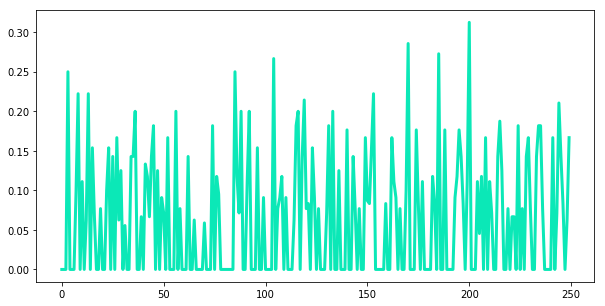

In [301]:
### MATCHES 
plt.figure(figsize=(10,5))
plt.plot(range(len(without_teacher_test_matches)), without_teacher_test_matches, color = '#0be8b7', linewidth = 3)
#plt.plot(range(4), by_student[:4], color = '#0be8b7', linewidth = 3)
#plt.xticks(np.arange(0, 5, step=1))
plt.show()

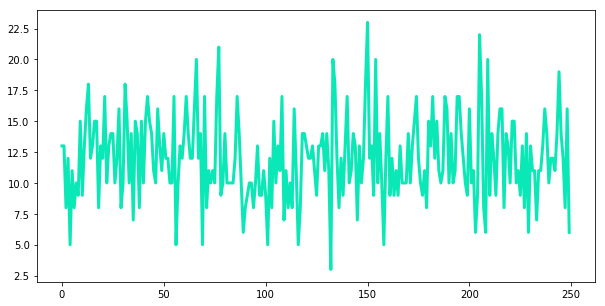

In [302]:
### ROUNDS
plt.figure(figsize=(10,5))
plt.plot(range(len(without_teacher_test_rounds)), without_teacher_test_rounds, color = '#0be8b7', linewidth = 3)
#plt.plot(range(4), by_student[:4], color = '#0be8b7', linewidth = 3)
#plt.xticks(np.arange(0, 5, step=1))
plt.show()

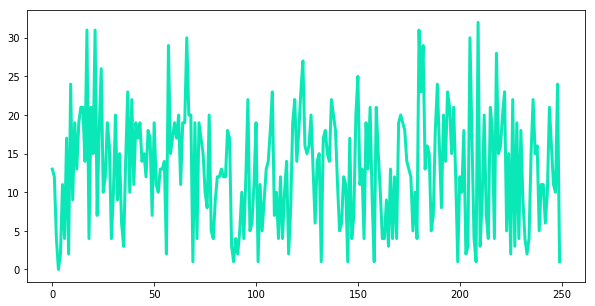

In [303]:
### MATERIAL DIFFERENCES
plt.figure(figsize=(10,5))
plt.plot(range(len(without_teacher_test_material)), without_teacher_test_material, color = '#0be8b7', linewidth = 3)
#plt.plot(range(4), by_student[:4], color = '#0be8b7', linewidth = 3)
#plt.xticks(np.arange(0, 5, step=1))
plt.show()